In [1]:
import ROOT as rt
import root_numpy as rtnp
import csv
import re
import sys
import uproot
import numpy as np
import awkward
import math
import numba

from matplotlib import pyplot as plt
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, std_color_list
from array import array
#from prettytable import PrettyTable
import collections
from collections import OrderedDict
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []


Welcome to JupyROOT 6.16/00


In [2]:
directory = '/mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190624/'
name_string1 = 'ntuple_RunIISummer16_'
name_string2 = '.root'

labels = {'bbbb_ggh_mh125_mx50_pl10000',
          'bbbb_ggh_mh125_mx50_pl1000',
          'bbbb_ggh_mh2000_mx975_pl1000'}

texs = {}

texs['bbbb_ggh_mh125_mx50_pl10000'] = 'm_{h} = 125 GeV, m_{x} = 50 GeV, c#tau = 10m'
texs['bbbb_ggh_mh125_mx50_pl1000'] = 'm_{h} = 125 GeV, m_{x} = 50 GeV, c#tau = 1m'
texs['bbbb_ggh_mh2000_mx975_pl1000'] = 'm_{h} = 2000 GeV, m_{x} = 975 GeV, c#tau = 1m'

MODEL = 'pp #rightarrow XX, X #rightarrow bb, X #rightarrow bb, ggH'

fpath = OrderedDict()
tree = OrderedDict()
nevts = OrderedDict()
for label in labels:
    print(label)
    fpath[label] = directory + name_string1 + label + name_string2
    print (label, fpath[label])

    print ('File ready')


    root_dir = uproot.open(fpath[label]) 
    print ('Open ready')

    tree[label] = root_dir['ntuples/llp']
    print ('Tree ready')

    nevts[label] = root_dir['ntuples/NEvents'][1]
    print ('NEvents = ', nevts[label])
    print ('NEvents ready')


bbbb_ggh_mh2000_mx975_pl1000
bbbb_ggh_mh2000_mx975_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh2000_mx975_pl1000.root
File ready
Open ready
Tree ready
NEvents =  17362.0
NEvents ready
bbbb_ggh_mh125_mx50_pl1000
bbbb_ggh_mh125_mx50_pl1000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl1000.root
File ready
Open ready
Tree ready
NEvents =  50918.0
NEvents ready
bbbb_ggh_mh125_mx50_pl10000
bbbb_ggh_mh125_mx50_pl10000 /mnt/hadoop/store/group/phys_exotica/jmao/jet_timing_studies/samples/signal/bbbb/ggh/ntuple_RunIISummer16_bbbb_ggh_mh125_mx50_pl10000.root
File ready
Open ready
Tree ready
NEvents =  50973.0
NEvents ready


In [3]:
#sort lists based on list1 and require list1 to be valid
def sort_valid_lists(list1, list2): 
    list3 = []
    for index, (ele1,ele2) in enumerate(zip(list1,list2)): 
#         print(index,ele1,ele2)
        if not math.isnan(ele1):
#             print("ele1 is not nan")
            list3.append(tuple((ele1,ele2)))
    list3.sort(key=lambda x: x[0])
    return list3 

# Smear jet time cut

19
1
3
0 0 0 17362
1 0 1 50918
2 0 2 50973


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh2000_mx975_pl1000_leading.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh125_mx50_pl1000_leading.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh125_mx50_pl10000_leading.png has been created


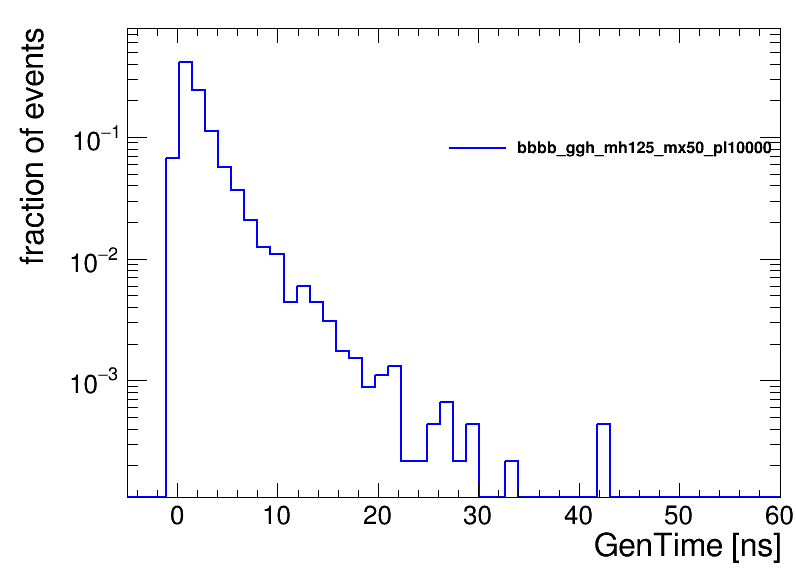

In [17]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0




# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])\


    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

        jetNewTime = np.array(jetNewTime)
        t = jetNewTime[:,0]
        
        # plot gen jet time
        c = rt.TCanvas('c','c', 800, 600)
        leg = rt.TLegend(0.55,0.68,0.95,0.80);
        leg.SetTextSize(0.03)
        rt.gStyle.SetOptStat(0000)
 
    
        ht0 = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[50,-5,60])
        ht0.SetLineColor(std_color_list[i])
        ht0.SetMarkerColor(std_color_list[i])


        leg.AddEntry(ht0,k)
        leg.SetBorderSize(0)

        ht0.DrawNormalized('')
 
  
        leg.Draw()
        c.SetLogy()
        c.Draw()
        c.SaveAs(out_dir+'GenNewTime'+k+'_leading.png')
        
#         if i>0:
#             break
        
    i+=1
       

19
1
3
0 0 0 17362
1 0 1 50918
2 0 2 50973


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh2000_mx975_pl1000_subleading.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh125_mx50_pl1000_subleading.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/GenNewTimebbbb_ggh_mh125_mx50_pl10000_subleading.png has been created


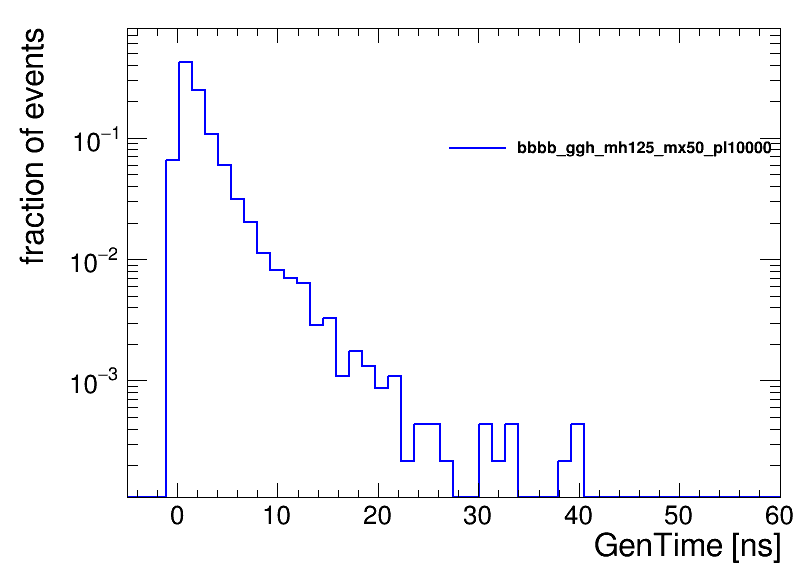

In [18]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0




# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])\


    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

        jetNewTime = np.array(jetNewTime)
        t = jetNewTime[:,1]
        
        # plot gen jet time
        c = rt.TCanvas('c','c', 800, 600)
        leg = rt.TLegend(0.55,0.68,0.95,0.80);
        leg.SetTextSize(0.03)
        rt.gStyle.SetOptStat(0000)
 
    
        ht0 = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[50,-5,60])
        ht0.SetLineColor(std_color_list[i])
        ht0.SetMarkerColor(std_color_list[i])


        leg.AddEntry(ht0,k)
        leg.SetBorderSize(0)

        ht0.DrawNormalized('')
 
  
        leg.Draw()
        c.SetLogy()
        c.Draw()
        c.SaveAs(out_dir+'GenNewTime'+k+'_subleading.png')
        
#         if i>0:
#             break
        
    i+=1
       

In [4]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts = []
Seconds = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])\


    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts.append(jetTime_most_delayed)
        Seconds.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts = np.array(Firsts)
Seconds = np.array(Seconds)
print('found max, second jet gen time')
print(len(Firsts),len(Seconds))


19
1
3
0 0 0 17362
1 0 1 50918
2 0 2 50973
found max, second jet gen time
3 3


In [5]:
i = 0
Power_1j = []
Power_2j = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
        print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts[n] 
        jetGenTime_second = Seconds[n] 
        print(len(weight),len(Firsts[n]),len(Seconds[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
            Ntotal_1j_w = np.sum(weight1_cut666)
            Ntotal_2j_w = np.sum(weight_cut666)
    #         print('1j total',Ntotal_1j_w)
    #         print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.sum(tcutted_w1_v)
            Nsel_2j_w = np.sum(tcutted_w_v)
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j.append(Power_eff_1j)
        Power_2j.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j = np.array(Power_1j)
Power_2j = np.array(Power_2j)
print(Power_1j)
print(Power_2j)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0.193
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
0 0.193
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
0 0.193
50918 50918 50918
[[1.         1.         1.         1.         1.         1.
  1.         0.99988401 0.9993622  0.99570964 0.98614325 0.96782232
  0.94753014 0.92033856 0.88949443 0.7139958  0.53374305 0.380218
  0.2702922 ]
 [1.         1.         1.         1.         1.         1.
  1.         0.99970476 0.99419293 0.97952755 0.94183075 0.88602363
  0.82007871 0.75364179 0.69370079 0.43661423 0.27637798 0.18937009
  0.13356301]
 [1.         1.         1.         1.         1.         1.
  0.99985656 0.99876616 0.99325665 0.97322737 0.92645416 0.85442914
  0.76951994 0.68360642 0.60300155 0.30061121 0.14571439 0.07489456
  0.04074723]]
[[1.         1.         1.         1.         1.         1.
  0.99993955 0.99921367 0.99558428 0.98070412 0.95

bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0.193
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
0 0.193
1 0 1
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
0 0.193
2 0 2


Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_2line.pdf has been created


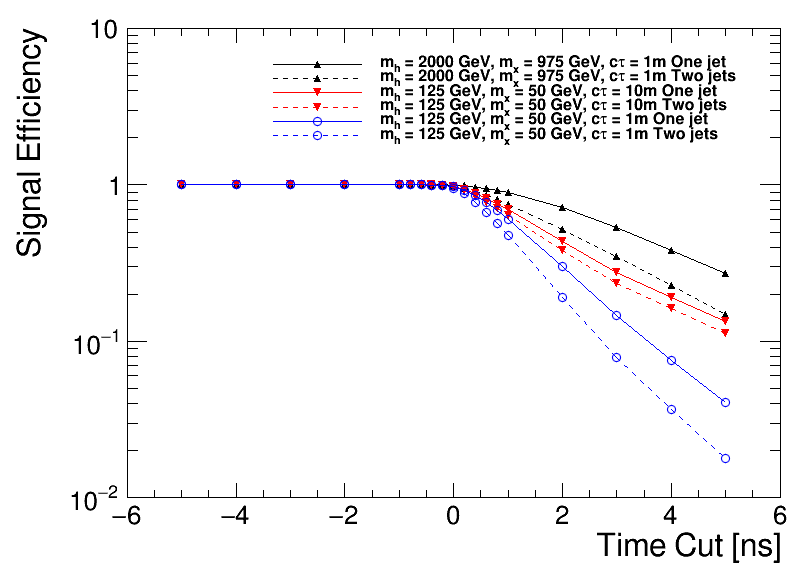

In [6]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
        print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)
 

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and i==0 :
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
        elif j==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
    
    n += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_2line.pdf')


# Decay before ECAL volume

In [7]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma=[0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_ecal = []
Seconds_ecal = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_ecal.append(jetTime_most_delayed)
        Seconds_ecal.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_ecal = np.array(Firsts_ecal)
Seconds_ecal = np.array(Seconds_ecal)
print('found max, second jet gen time')
print(len(Firsts_ecal),len(Seconds_ecal))


19
1
3
0 0 0 17362
1 0 1 50973
2 0 2 50918
found max, second jet gen time
3 3


In [8]:
i = 0
Power_1j_ecal = []
Power_2j_ecal = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
#             Ntotal_1j_w = np.shape(weight1_cut666)[0]          
#             Ntotal_2j_w = np.shape(weight_cut666)[0]
            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(tcutted_w1_v)[0]
            Nsel_2j_w = np.shape(tcutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_ecal.append(Power_eff_1j)
        Power_2j_ecal.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_ecal = np.array(Power_1j_ecal)
Power_2j_ecal = np.array(Power_2j_ecal)
print(Power_1j_ecal)
print(Power_2j_ecal)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918
[[0.99343394 0.99343394 0.99343394 0.99343394 0.99343394 0.99343394
  0.99343394 0.99337634 0.99245479 0.98917175 0.98035941 0.96463541
  0.94079023 0.91395001 0.88209884 0.70596705 0.53041124 0.37933418
  0.26972699]
 [0.19932121 0.19932121 0.19932121 0.19932121 0.19932121 0.19932121
  0.19930159 0.19910541 0.1981245  0.19476978 0.18774645 0.17705452
  0.16389069 0.15119769 0.13811233 0.08710494 0.05483295 0.03796127
  0.02670041]
 [0.68441416 0.68441416 0.68441416 0.68441416 0.68441416 0.68441416
  0.68435524 0.68374642 0.6796025  0.66536392 0.63280176 0.58219097
  0.52592403 0.46694686 0.41392042 0.20460348 0.09978789 0.05196591
  0.02743627]]
[[0.95219445 0.95219445 0.95219445 0.95219445 0.95219445 0.95219445
  0.95213685 0.95161848 0.94804746 0.934

bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 1
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.pdf has been created


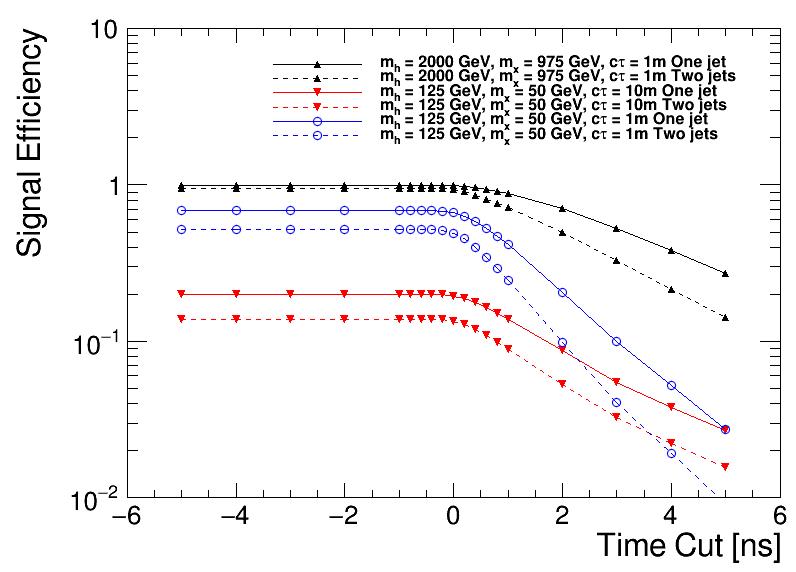

In [9]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.32,0.75,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_ecal[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_ecal[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)


        leg.SetBorderSize(0)


        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-2,1e1)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if i==0 and j==0:
            h1s[i].Draw('ALPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
        elif j==0:
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h1s[i],texs[k]+' One jet')
            leg.AddEntry(h2s[i],texs[k]+' Two jets')
    
    n += 1


leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_Ecal_2line.pdf')


# Real trigger case (Pt & Time)

In [10]:
i = 0

Pt_maxes = []
Pt_seconds = []
for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()
    jetPt = v['gLLP_daughter_pt'].array()
    
    jetPt = np.array(jetPt)
    
    maxes = jetPt[:,0]
    seconds = jetPt[:,1]
#     print(jetPt[0],maxes[0],seconds[0])
#     print(jetPt[1],maxes[1],seconds[1])
    
    maxes = np.array(maxes)
    seconds = np.array(seconds)
    print(i, len(weight), len(maxes),len(seconds))    

    Pt_maxes.append(maxes)
    Pt_seconds.append(seconds)
    
    i += 1

Pt_maxes = np.array(Pt_maxes)
Pt_seconds = np.array(Pt_seconds)
print('found max second Pts', len(Pt_maxes),len(Pt_seconds))

bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 50918 50918 50918
found max second Pts 3 3


In [11]:
i = 0
Power_1j_trg = []
Power_2j_trg = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
            
            ptcut_string1 = np.logical_and( jetPt_max > 60, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > 60, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)
           
            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)
            

            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
            
            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]
            
            
            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]
            
            
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_trg.append(Power_eff_1j)
        Power_2j_trg.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_trg = np.array(Power_1j_trg)
Power_2j_trg = np.array(Power_2j_trg)
print(Power_1j_trg)
print(Power_2j_trg)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918
50918 50918 50918
[[9.85600737e-01 9.85600737e-01 9.85600737e-01 9.85600737e-01
  9.85600737e-01 9.85600737e-01 9.85600737e-01 9.85543140e-01
  9.84621587e-01 9.81396153e-01 9.72641401e-01 9.57032600e-01
  9.33475406e-01 9.06807971e-01 8.75302385e-01 7.00783320e-01
  5.26091464e-01 3.76281534e-01 2.67192720e-01]
 [5.86585055e-03 5.86585055e-03 5.86585055e-03 5.86585055e-03
  5.86585055e-03 5.86585055e-03 5.84623232e-03 5.84623232e-03
  5.84623232e-03 5.72852294e-03 5.29692190e-03 4.74761148e-03
  4.10020992e-03 3.64899064e-03 3.08006199e-03 2.11876876e-03
  1.45174897e-03 1.19671198e-03 1.07900261e-03]
 [2.37833379e-02 2.37833379e-02 2.37833379e-02 2.37833379e-02
  2.37833379e-02 2.37833379e-02 2.37833379e-02 2.376369

bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 1
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.pdf has been created


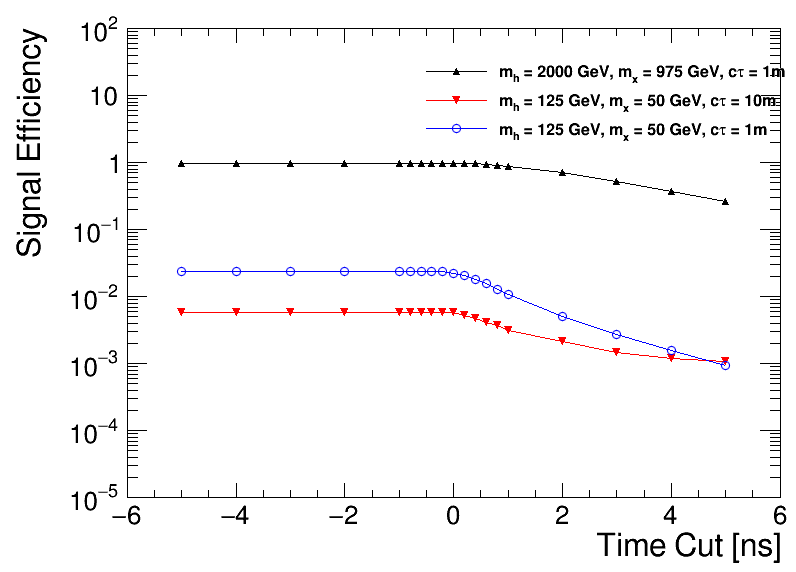

In [12]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,sig in enumerate(sigma):
#         print(j,sig)

        i = n*len(sigma)+j
        print(n,j,i)

        Power_eff_i = Power_1j_trg[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trg[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0 :
            h1s[i].Draw('ALPsame')
        elif j==0:
            h1s[i].Draw('LPsame')
            
        if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
            leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==0:
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trg_2line.pdf')


# Pt thresholds scan

In [13]:
i = 0
Power_1j_trgs = []
Power_2j_trgs = []

pt_cuts = [0, 20,30,40,50,60]

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+0
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))

#         for mm, nn in enumerate(pt_cuts):
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)

            ptcut_string1 = np.logical_and( jetPt_max > pt, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > pt, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)

            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)


            Ntotal_1j_w = nevts[k]          
            Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]

            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]


            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]


    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_trgs.append(Power_eff_1j)
        Power_2j_trgs.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_trgs = np.array(Power_1j_trgs)
Power_2j_trgs = np.array(Power_2j_trgs)
print(len(Power_1j_trgs))
print(len(Power_2j_trgs))


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
18
18


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 6
1 1 7
1 2 8
1 3 9
1 4 10
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.pdf has been created


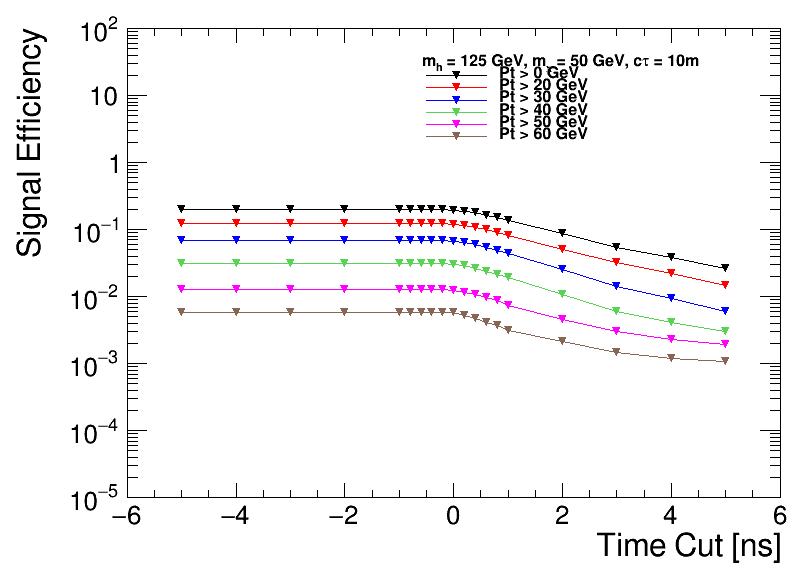

In [14]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==1:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==1:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==1:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_trgs_2line.pdf')


# others

In [15]:
test = 180*math.atan(1)/math.pi
print(test,' deg')
test1 = math.tan(math.atan(1))
print(test1, 'tan value')
theta = 2*math.atan(math.exp(-1.479))
z = 1.29/math.tan(theta)
print(theta,z)

45.0  deg
0.9999999999999999 tan value
0.4480802598611997 2.683644721727066


In [16]:
theta = 2*math.atan(math.exp(-1.78377))
z = 1.29/math.tan(theta)
print(theta,z)

0.33289834738058155 3.7308416319407427


In [17]:
import numpy as np

print('Does Olmo suck?')
if np.random.uniform() > 0.5:
    print ('Yes')
else: print ('No')

Does Olmo suck?
No


In [18]:
theta = 2*math.atan(math.exp(-1.7837746))
z = -0.538/math.tan(theta)
print(theta,z)


0.33289684417918397 -1.5559709825134156


# TOTAL NUM = TOTAL EVENTS

In [43]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_Ecal = []
Seconds_Ecal = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_Ecal.append(jetTime_most_delayed)
        Seconds_Ecal.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_Ecal = np.array(Firsts_Ecal)
Seconds_Ecal = np.array(Seconds_Ecal)
print('found max, second jet gen time')
print(len(Firsts_Ecal),len(Seconds_Ecal))


19
1
3
0 0 0 17362
1 0 1 50973
2 0 2 50918
found max, second jet gen time
3 3


In [44]:
i = 0
Power_1j_Ecal = []
Power_2j_Ecal = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_Ecal[n] 
        jetGenTime_second = Seconds_Ecal[n] 
        print(len(weight),len(Firsts_Ecal[n]),len(Seconds_Ecal[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
            Ntotal_1j_w = nevts[k]         
            Ntotal_2j_w = nevts[k]
#             Ntotal_1j_w = np.shape(weight1_cut666)[0]          
#             Ntotal_2j_w = np.shape(weight_cut666)[0]
#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(tcutted_w1_v)[0]
            Nsel_2j_w = np.shape(tcutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Ecal.append(Power_eff_1j)
        Power_2j_Ecal.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Ecal = np.array(Power_1j_Ecal)
Power_2j_Ecal = np.array(Power_2j_Ecal)
# print(Power_1j_Ecal)
# print(Power_2j_Ecal)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918


In [48]:
i = 0
Power_1j_Trgs = []
Power_2j_Trgs = []

pt_cuts = [0,20,30,40,50,60]

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+0
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))

#         for mm, nn in enumerate(pt_cuts):
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)

            ptcut_string1 = np.logical_and( jetPt_max > pt, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > pt, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)

            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)
            
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
#             Ntotal_1j_w = np.shape(weight1_cut666)[0]          
#             Ntotal_2j_w = np.shape(weight_cut666)[0]

            Ntotal_1j_w = nevts[k]        
            Ntotal_2j_w = nevts[k]

#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]

            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]


            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]


    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)

            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j)
        print('pt',pt)
        print('t cut',t_cuts)
        print('Signal Efficiency 1jet: ',Power_eff_1j)
        print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Trgs.append(Power_eff_1j)
        Power_2j_Trgs.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Trgs = np.array(Power_1j_Trgs)
Power_2j_Trgs = np.array(Power_2j_Trgs)
# print(Power_1j_Trgs[2])
# print(Power_2j_Trgs)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
17362 17362 17362
pt 0
t cut [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0]
Signal Efficiency 1jet:  [0.99343394 0.99343394 0.99343394 0.99343394 0.99343394 0.99343394
 0.99343394 0.99337634 0.99245479 0.98917175 0.98035941 0.96463541
 0.94079023 0.91395001 0.88209884 0.70596705 0.53041124 0.37933418
 0.26972699]
Signal Efficiency 2jet:  [0.95219445 0.95219445 0.95219445 0.95219445 0.95219445 0.95219445
 0.95213685 0.95161848 0.94804746 0.93480014 0.90542564 0.86067273
 0.81200323 0.76275775 0.71247552 0.49850248 0.33031909 0.21437622
 0.14134316]
17362 17362 17362
17362 17362 17362
pt 20
t cut [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0]
Signal Efficiency 1jet:  [0.99256998 0.99256998 0.99256998 0.99256998 0.99256998 0.99256998
 0.99256998 0.99251238 0.99159083 0.9883078  0.97949545 0.96377

pt 40
t cut [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0]
Signal Efficiency 1jet:  [0.11891669 0.11891669 0.11891669 0.11891669 0.11891669 0.11891669
 0.11887741 0.11881849 0.11765977 0.1145371  0.10760438 0.09694018
 0.08511725 0.07337287 0.06372992 0.02749519 0.01203896 0.00597038
 0.00331906]
Signal Efficiency 2jet:  [0.09228564 0.09228564 0.09228564 0.09228564 0.09228564 0.09228564
 0.09228564 0.09212852 0.09061629 0.08641345 0.07790958 0.06624376
 0.05499038 0.04568129 0.03739346 0.01276562 0.0047331  0.00208178
 0.00102125]
50918 50918 50918
50918 50918 50918
pt 50
t cut [-5.0, -4.0, -3.0, -2.0, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0]
Signal Efficiency 1jet:  [0.050218   0.050218   0.050218   0.050218   0.050218   0.050218
 0.05017872 0.05013944 0.0495699  0.04788091 0.04454221 0.03975019
 0.03440826 0.02900742 0.02486351 0.0109588  0.00585255 0.00314231
 0.00176755]
Signal Efficien

# TOTAL NUM = INSIDE ECAL

In [19]:
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
print(len(t_cuts))
sigma = [0.193]
print(len(sigma))
print(len(tree))
ntr = len(tree)

i=0

Firsts_Ecal = []
Seconds_Ecal = []
# loop over events and get an array of maximum jet time in events
for k,v in tree.items():   

#         print(i, k, v)
    jetGenTime = v['gen_time'].array()
    BSTime = v['genVertexT'].array()

    jetTime = [x-y for x,y in zip(jetGenTime,BSTime)]
    
#     print(jetGenTime[0],BSTime[0], jetTime[0])

    jetPt = v['gLLP_daughter_pt'].array()
    weight = v['genWeight'].array()
    
    for j,sig in enumerate(sigma):
#     for j,sig in enumerate(sigma):
#         print(j,sig)
        n = i*len(sigma)+j
#         print('n',n)
        print(i, j, n,len(weight))
        SmearTime = np.random.normal(0,sig,len(BSTime))
        jetNewTime = [x+y for x,y in zip(jetTime,SmearTime)]
#         print(jetTime[0],SmearTime[0], jetNewTime[0])    

    
        jetTime_most_delayed = []
        jetTime_second_delayed = []

        for evt, (time, pt) in enumerate(zip(jetNewTime,jetPt)):
    #         print(i,time,pt,len(time),len(pt))
            time_s =[]
            pt_s= []
            for par in range(len(time)):
    #             print(j,pt[j])
                time_s.append(time[par])
                pt_s.append(pt[par])
    #         print(i,time_s)
    #         print(i,pt_s)
            validpairlist = sort_valid_lists(time_s,pt_s)
    #         print(i,validpairlist)
    #         print(validpairlist[-1][0])
            if len(validpairlist)>1 :
    #             print(i,len(validpairlist))
    #             print(i,validpairlist[-1][0],validpairlist[-2][0])
                jetTime_most_delayed.append(validpairlist[-1][0])
                jetTime_second_delayed.append(validpairlist[-2][0])
            else:
                jetTime_most_delayed.append(-666)
                jetTime_second_delayed.append(-666)
#             if i>2:
#                 break
        jetTime_most_delayed = np.array(jetTime_most_delayed)
        jetTime_second_delayed = np.array(jetTime_second_delayed)
#         print(i, j, n,len(jetTime_most_delayed),len(jetTime_second_delayed))
    
        Firsts_Ecal.append(jetTime_most_delayed)
        Seconds_Ecal.append(jetTime_second_delayed)
#         print(n,'found max jet gen time')

    i += 1
    
Firsts_Ecal = np.array(Firsts_Ecal)
Seconds_Ecal = np.array(Seconds_Ecal)
print('found max, second jet gen time')
print(len(Firsts_Ecal),len(Seconds_Ecal))


19
1
3
0 0 0 17362
1 0 1 50973
2 0 2 50918
found max, second jet gen time
3 3


In [20]:
i = 0
Power_1j_Ecal = []
Power_2j_Ecal = []

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,sig in enumerate(sigma):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+j
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_Ecal[n] 
        jetGenTime_second = Seconds_Ecal[n] 
        print(len(weight),len(Firsts_Ecal[n]),len(Seconds_Ecal[n]))
        
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)
    #         print(tcut_string)
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
            Ntotal_1j_w = np.shape(weight1_cut666)[0]          
            Ntotal_2j_w = np.shape(weight_cut666)[0]
#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]
    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(tcutted_w1_v)[0]
            Nsel_2j_w = np.shape(tcutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Ecal.append(Power_eff_1j)
        Power_2j_Ecal.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Ecal = np.array(Power_1j_Ecal)
Power_2j_Ecal = np.array(Power_2j_Ecal)
# print(Power_1j_Ecal)
# print(Power_2j_Ecal)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918


In [21]:
i = 0
Power_1j_Trgs = []
Power_2j_Trgs = []

pt_cuts = [0,20,30,40,50,60]

for k,v in tree.items():   
    print(k, v)
#     jetGenTime = v['gen_time'].array()
    weight = v['genWeight'].array()



    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        Power_eff_1j = []
        Power_eff_2j = []

        n = i*len(sigma)+0
#         print(n)
#         print(i,j,n,len(weight))

        jetGenTime_max = Firsts_ecal[n] 
        jetGenTime_second = Seconds_ecal[n] 
        print(len(weight),len(Firsts_ecal[n]),len(Seconds_ecal[n]))
        
        jetPt_max = Pt_maxes[i] 
        jetPt_second = Pt_seconds[i] 
        print(len(weight),len(Pt_maxes[i]),len(Pt_seconds[i]))

#         for mm, nn in enumerate(pt_cuts):
        for p, q in enumerate(t_cuts):
#             print(p,q)
#             n = i*ntr+j
#             jetGenTime_max = Firsts[n] 
#             jetGenTime_second = Seconds[n] 
#             if i==1 :
#                 print(len(weight),len(Firsts[n]),len(Seconds[n]))

            tcut_string1 = np.logical_and( jetGenTime_max > q, jetGenTime_max>-600)
            tcut_string2 = np.logical_and( jetGenTime_second > q, jetGenTime_second>-600)
            tcut_string = np.logical_and( tcut_string1, tcut_string2)

            ptcut_string1 = np.logical_and( jetPt_max > pt, jetPt_max>-600)
            ptcut_string2 = np.logical_and( jetPt_second > pt, jetPt_second>-600)
            ptcut_string = np.logical_and( ptcut_string1, ptcut_string2)

            cut_string = np.logical_and( ptcut_string1, tcut_string)
            cut_string1 = np.logical_and( ptcut_string1, tcut_string1)
            cut_string2 = np.logical_and( ptcut_string2, tcut_string2)
            
            tcut666_string1 = np.logical_and( jetGenTime_max, jetGenTime_max>-600)
            tcut666_string = np.logical_and( jetGenTime_second>-600, jetGenTime_max>-600)
    #         print(tcut666_string1)
    #         print(tcut666_string)
            weight1_cut666 = weight[tcut666_string1]
            weight_cut666 = weight[tcut666_string]
#             Ntotal_1j_w = np.sum(weight1_cut666)          
#             Ntotal_2j_w = np.sum(weight_cut666)
            Ntotal_1j_w = np.shape(weight1_cut666)[0]          
            Ntotal_2j_w = np.shape(weight_cut666)[0]

#             Ntotal_1j_w = nevts[k]          
#             Ntotal_2j_w = nevts[k]
#             print('1j total',Ntotal_1j_w)
#             print('2j total',Ntotal_2j_w)

            tcutted_w_v = weight[tcut_string]
            tcutted_w1_v = weight[tcut_string1]
            tcutted_w2_v = weight[tcut_string2]

            ptcutted_w_v = weight[ptcut_string]
            ptcutted_w1_v = weight[ptcut_string1]
            ptcutted_w2_v = weight[ptcut_string2]


            cutted_w_v = weight[cut_string]
            cutted_w1_v = weight[cut_string1]
            cutted_w2_v = weight[cut_string2]


    #         Nsel_w = np.sum(tcutted_w_v)
#             Nsel_1j_w = np.sum(tcutted_w1_v)
#             Nsel_2j_w = np.sum(tcutted_w_v)
            Nsel_1j_w = np.shape(cutted_w1_v)[0]
            Nsel_2j_w = np.shape(cutted_w_v)[0]
    #         print(Nsel_w)
    #         Nrej_w = 1.*Ntotal_w - 1.*Nsel_w
    #         Prej_2j_i = 1.0*Ntotal_w/Nsel_w
    #         Power_rej_2j_i.append(Prej_2j_i)
            Peff_1j_i = 1.0*Nsel_1j_w/Ntotal_1j_w
            Peff_2j_i = 1.0*Nsel_2j_w/Ntotal_2j_w
            Power_eff_1j.append(Peff_1j_i)
            Power_eff_2j.append(Peff_2j_i)

    #     Power_rej_2j_i = np.array(Power_rej_2j_i) 
    # #     print('Rejection power',Power_rej_i)
    #     Power_rej_2j.append(Power_rej_2j_i)

        Power_eff_1j = np.array(Power_eff_1j) 
        Power_eff_2j = np.array(Power_eff_2j) 
#         print('Signal Efficiency 1jet: ',Power_eff_1j)
#         print('Signal Efficiency 2jet: ',Power_eff_2j)
        Power_1j_Trgs.append(Power_eff_1j)
        Power_2j_Trgs.append(Power_eff_2j)
    
    i += 1
    
# Power_rej_2j = np.array(Power_rej_2j)        
Power_1j_Trgs = np.array(Power_1j_Trgs)
Power_2j_Trgs = np.array(Power_2j_Trgs)
# print(Power_1j_Trgs[2])
# print(Power_2j_Trgs)


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
17362 17362 17362
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
50973 50973 50973
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918
50918 50918 50918


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 6
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 12


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.pdf has been created


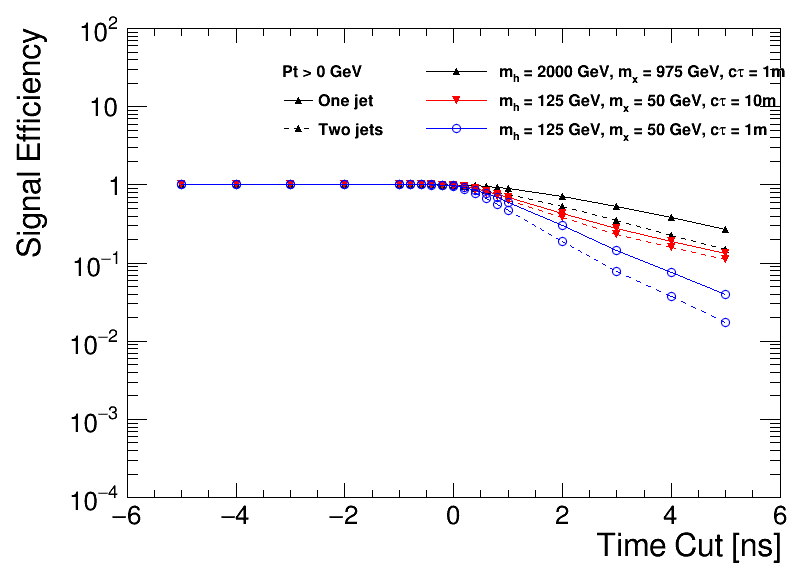

In [22]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==0:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==0:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 6
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 12


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt0.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt0.pdf has been created


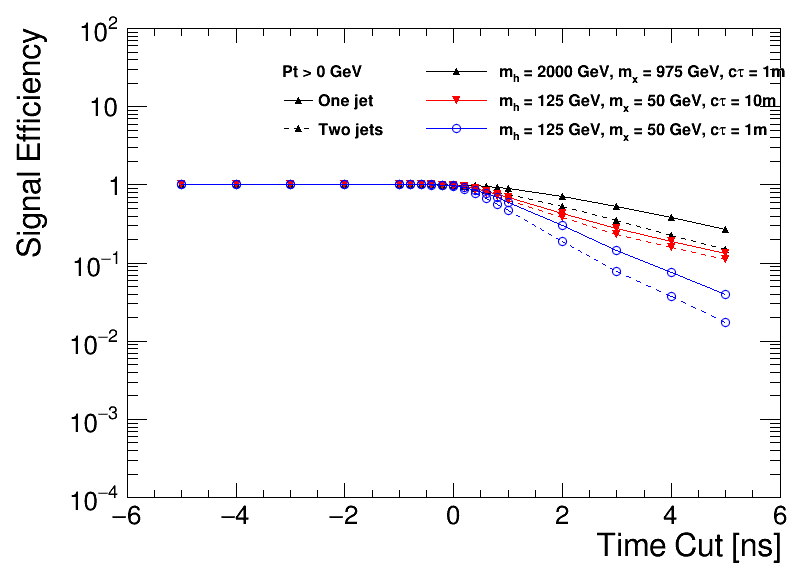

In [23]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==0:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==0:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt0.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt0.pdf')


[-5.  -4.  -3.  -2.  -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   2.   3.   4.   5. ]
bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
pt cut 0
power1 [1.         1.         1.         1.         1.         1.
 1.         0.99994202 0.99901438 0.99570965 0.98683905 0.97101113
 0.94700835 0.91999072 0.88792904 0.71063312 0.53391698 0.38184137
 0.27150974]
power2 [1.         1.         1.         1.         1.         1.
 0.99993951 0.99939511 0.99564481 0.9817324  0.95088314 0.90388338
 0.85277038 0.8010525  0.74824583 0.52353012 0.34690298 0.22513912
 0.14843939]
pt cut 20
power1 [0.99913033 0.99913033 0.99913033 0.99913033 0.99913033 0.99913033
 0.99913033 0.99907236 0.99814471 0.99483998 0.98596939 0.97014147
 0.94613868 0.91917904 0.8872333  0.70993738 0.5333372  0.38137755
 0.2711039 ]
power2 [0.99921365 0.99921365 0.99921365 0.99921365 0.99921365 0.99921365
 0.99915316 0.99860876 0.99485846 0.98094604 0.95021776 0.903218
 0.8521655  0.80044762 0.74770143 0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt20.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt20.pdf has been created


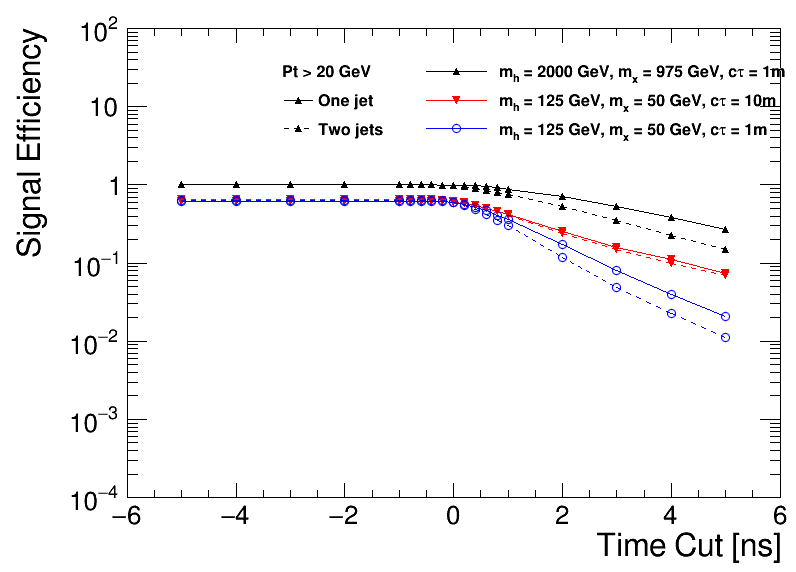

In [24]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
print(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)
        print('pt cut',pt)
        print('power1',power1)
        print('power2',power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==1 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==1:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==1:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt20.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt20.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 2 2
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 2 8
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 2 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt30.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt30.pdf has been created


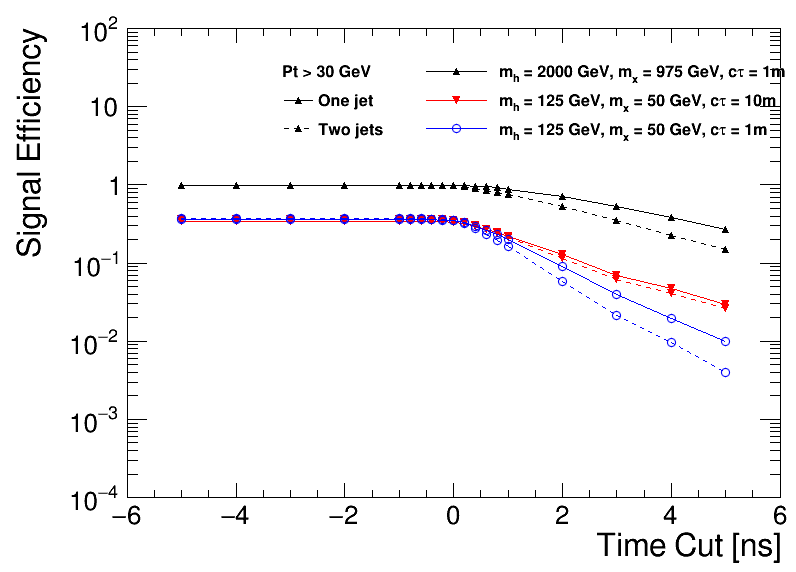

In [25]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==2 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==2:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt30.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt30.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 3 3
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 3 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 3 15


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt40.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt40.pdf has been created


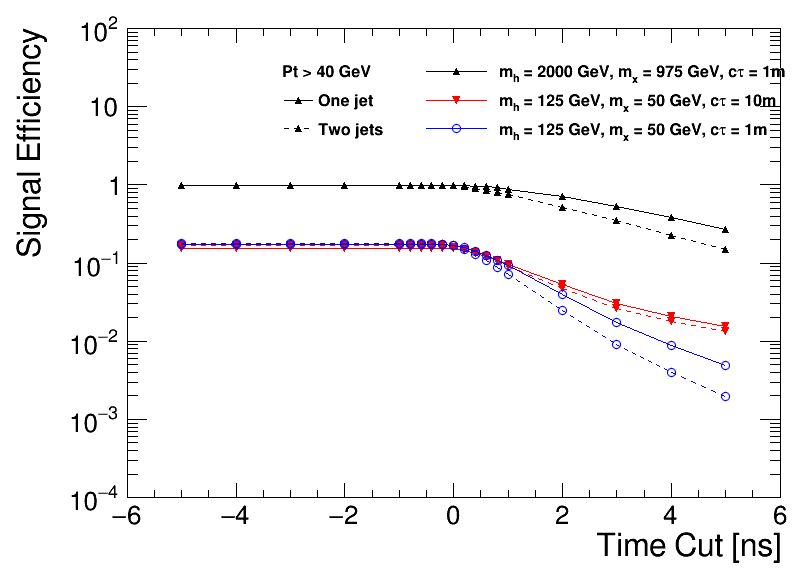

In [26]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==3 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==3:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==3:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt40.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt40.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 4 10
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 4 16


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt50.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt50.pdf has been created


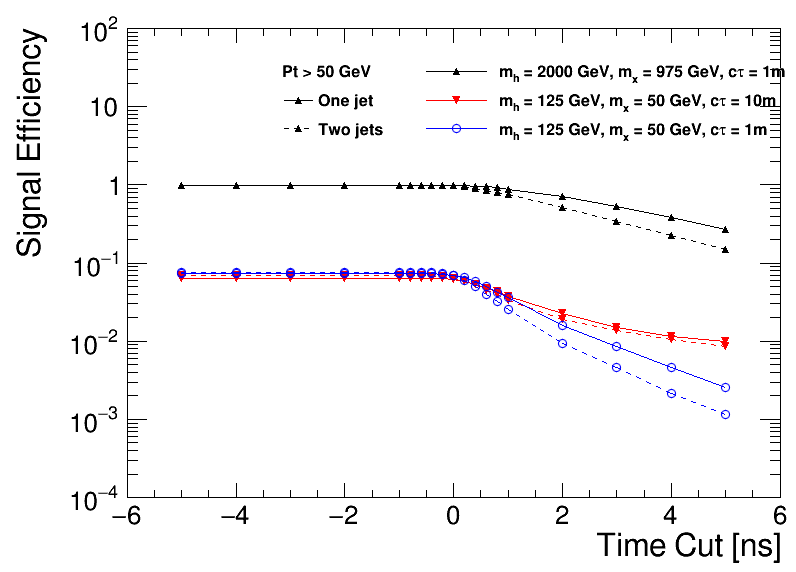

In [27]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==4 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==4:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==4:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt50.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt50.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 5 5
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 5 17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt60.png has been created
Info in <TCanvas::Print>: pdf file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt60.pdf has been created


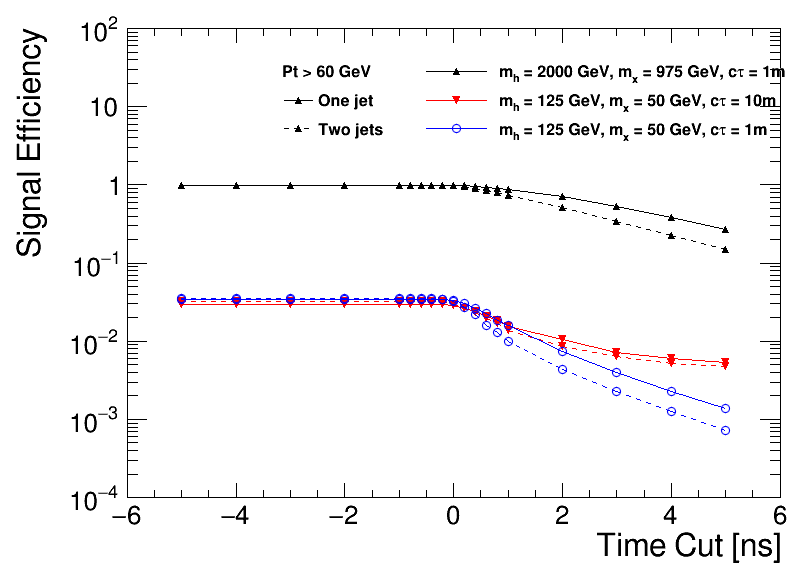

In [28]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[n])
        h1s[i].SetMarkerColor(std_color_list[n])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==5 and n==0:
            print(n,j,i)
            leg.SetHeader('Pt > '+str(pt)+' GeV')
            h1s[i].Draw('ALPsame')
            leg.AddEntry(h1s[i],'One jet')
            h2s[i].Draw('LPsame')
            leg.AddEntry(h2s[i],'Two jets')
        elif j==5:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            h2s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if j==5:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
    
    n += 1


leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt60.png')
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_2line_pt60.pdf')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 12
0.8
0 0.6822577405377486
2 1 13
20 0.40922264627392463
2 2 14
30 0.2296479095526414
2 3 15
40 0.10720537174667853
2 4 16
50 0.04238285173175701
2 5 17
60 0.018422336365462425


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass1.png has been created


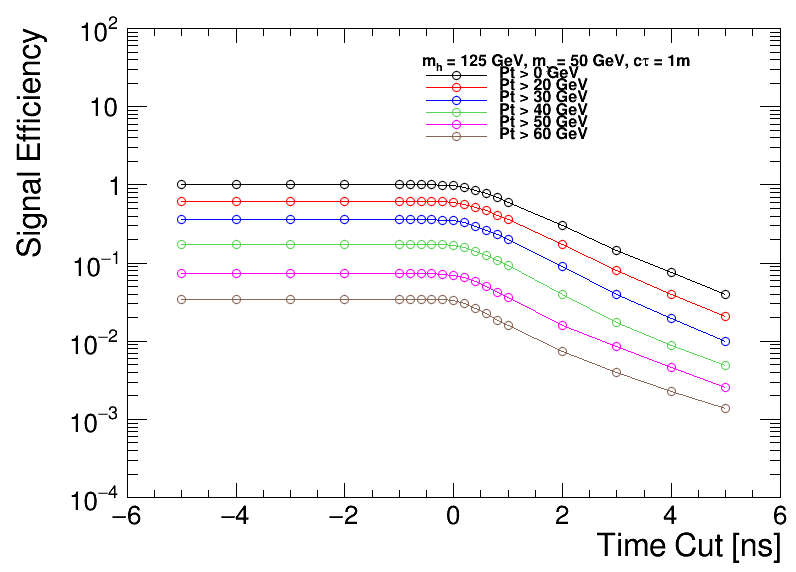

In [29]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==2:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
            print(t_cuts[13])
            print(pt,power1[13])
        elif n==2:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            print(pt,power1[13])
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==2:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass1.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
0 5 5
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass2.png has been created


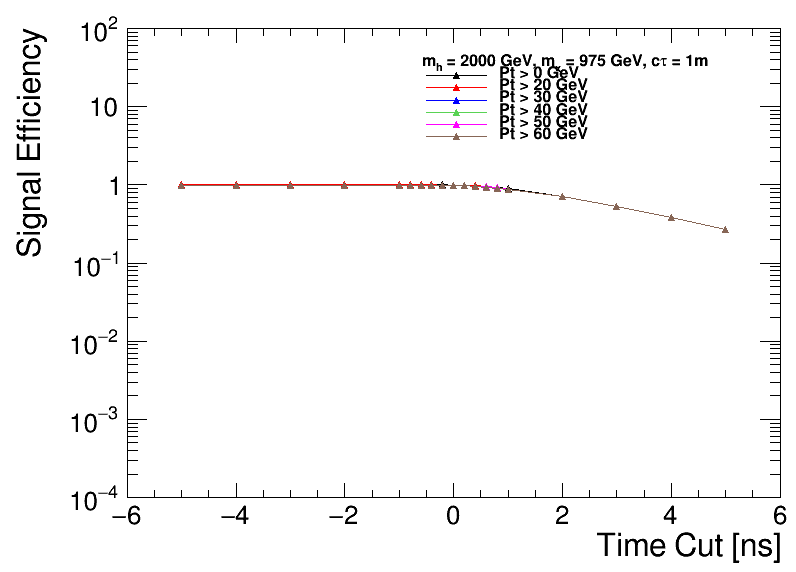

In [30]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==0:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==0:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass2.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 6
1 1 7
1 2 8
1 3 9
1 4 10
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass3.png has been created


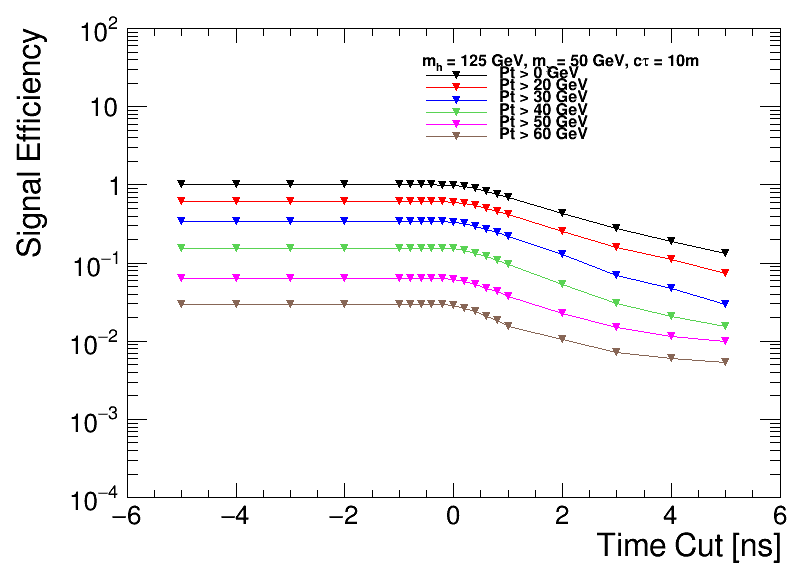

In [31]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==1:
            print(n,j,i)
            h1s[i].Draw('ALPsame')
        elif n==1:
            print(n,j,i)
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
        if n==1:
            leg1.SetHeader(texs[k])
            leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Mass3.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 1 1
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 1 7
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 1 13


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt20.png has been created


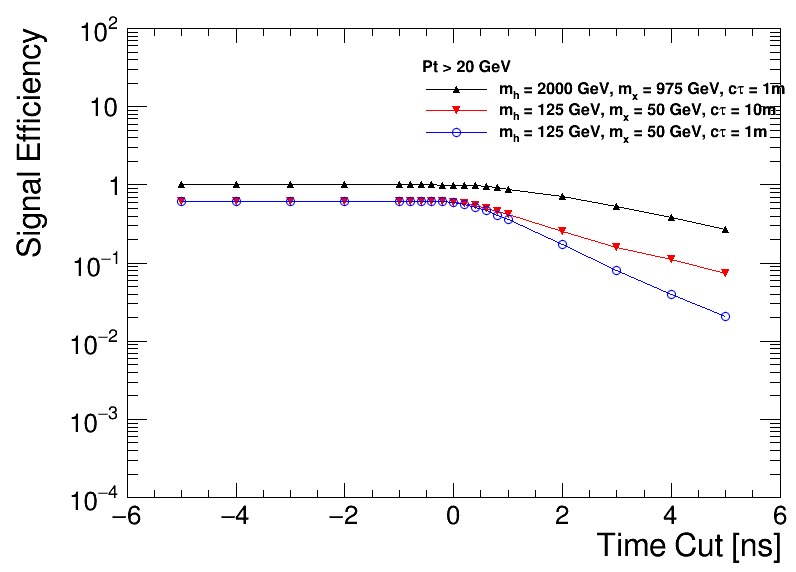

In [32]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==1 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].SetLineColor(std_color_list[n])
            h1s[i].SetMarkerColor(std_color_list[n])
            h1s[i].Draw('ALPsame')
        elif j==1:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].SetLineColor(std_color_list[n])
            h1s[i].SetMarkerColor(std_color_list[n])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt20.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 0 0
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 0 6
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 0 12


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt0.png has been created


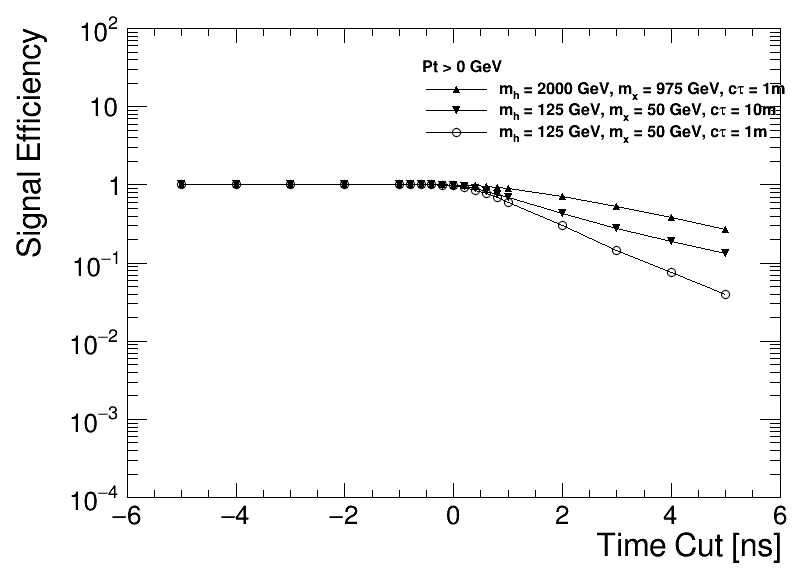

In [33]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==0 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==0:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt0.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 2 2
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 2 8
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 2 14


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt30.png has been created


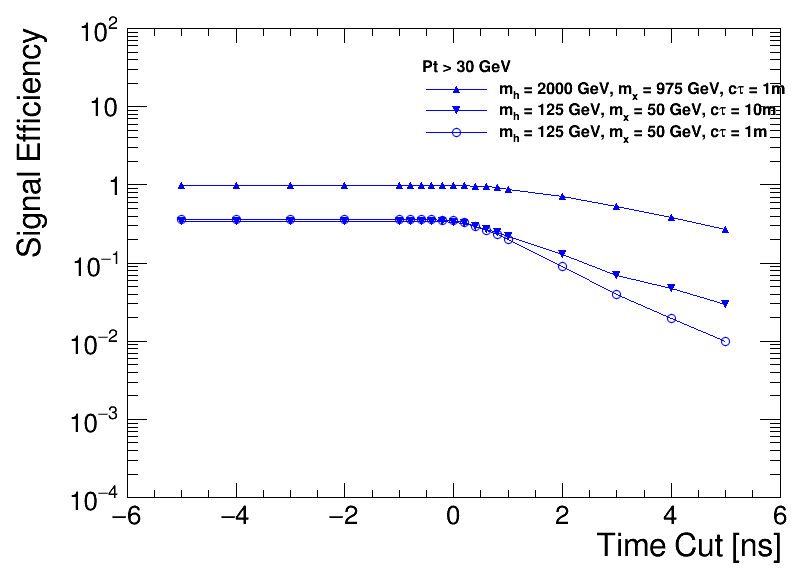

In [34]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==2 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==2:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt30.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 3 3
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 3 9
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 3 15


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt40.png has been created


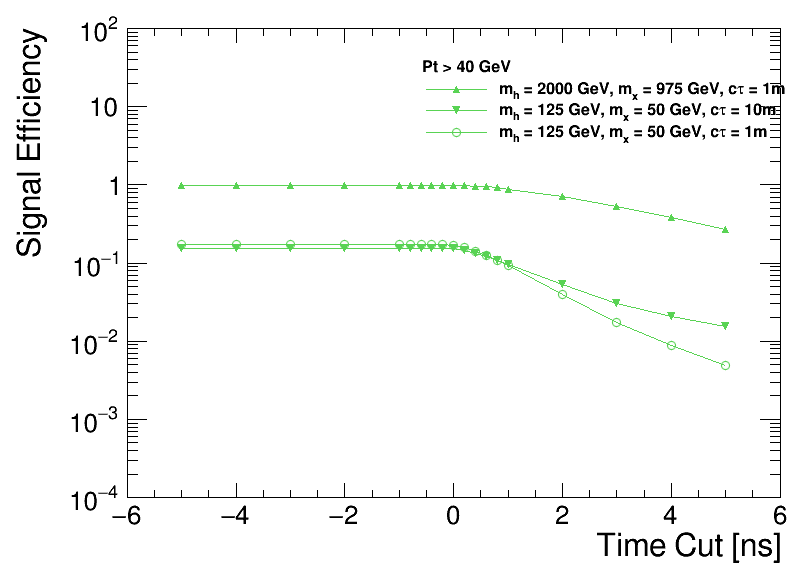

In [35]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==3 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==3:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt40.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 4 4
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 4 10
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 4 16


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt50.png has been created


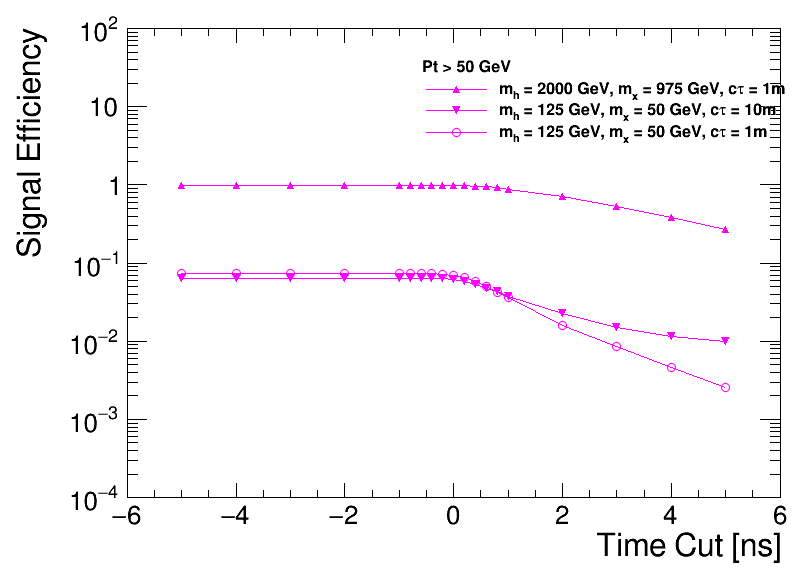

In [36]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==4 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==4:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt50.png')


bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
0 5 5
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
1 5 11
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
2 5 17


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt60.png has been created


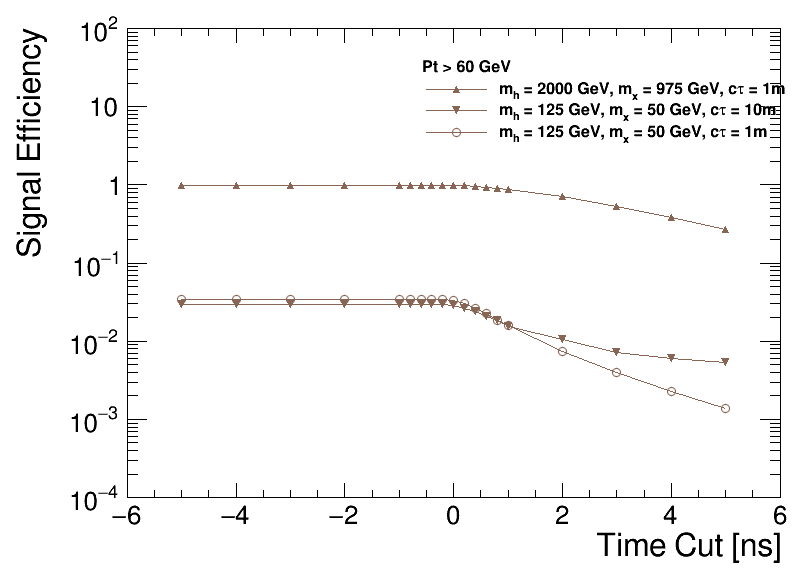

In [37]:
# plot leading n subleading jet time
t_cuts = [-5.,-4.,-3.,-2.,-1.,-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8,1.,2.,3.,4.,5.]
num = len(t_cuts)
t_cuts = np.array(t_cuts)
sigma = [0.2,0.4,0.6,0.8,1.]

c = rt.TCanvas('c','c', 800, 600)
#h = {}
leg = rt.TLegend(0.35,0.75,0.55,0.90);
leg1 = rt.TLegend(0.52,0.75,0.95,0.90);
leg.SetTextSize(0.03)
leg1.SetTextSize(0.03)

rt.gStyle.SetOptStat(0000)
n = 0

h1s = {}
h2s = {}

for k,v in tree.items():   
    print(k, v)
    
    for j,pt in enumerate(pt_cuts):
#         print(j,sig)

        i = n*len(pt_cuts)+j
#         print(n,j,i)

        Power_eff_i = Power_1j_Trgs[i] 

        power1 = np.array(Power_eff_i) 
#         print(num, len(t_cuts), len(power1))
#         print(num, len(t_cuts), len(power1),t_cuts, power1)
        h1s[i] = rt.TGraph(num , t_cuts, power1)

        Power_eff_2j_i = Power_2j_Trgs[i] 

        power2 = np.array(Power_eff_2j_i) 
        h2s[i] = rt.TGraph(num , t_cuts, power2)

        h1s[i].SetLineColor(std_color_list[j])
        h1s[i].SetMarkerColor(std_color_list[j])
        h1s[i].SetMarkerStyle(22+n)
        h1s[i].GetYaxis().SetRangeUser(1e-5,1e2)
        #     hrej[m].SetMarkerSize(2)

        h2s[i].SetLineStyle(7)
        h2s[i].SetLineColor(std_color_list[n])
        h2s[i].SetMarkerColor(std_color_list[n])
        h2s[i].SetMarkerStyle(22+n)
        h2s[i].GetYaxis().SetRangeUser(1e-5,1e2)


        leg.SetBorderSize(0)
        leg1.SetBorderSize(0)
#         leg.AddEntry(h2s[i],k+' Two jets')

        h1s[i].SetTitle( 'Signal Efficiency' )
        h1s[i].GetXaxis().SetTitle( 'Time Cut [ns]' )
        #hrej[m].GetXaxis().SetRangeUser(-10,10)
        h1s[i].GetYaxis().SetRangeUser(1e-4,1e2)
        h1s[i].GetYaxis().SetTitle( 'Signal Efficiency' )
        if j==5 and n==0:
            print(n,j,i)
            leg1.SetHeader('Pt > '+str(pt)+' GeV')
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('ALPsame')
        elif j==5:
            print(n,j,i)
            leg1.AddEntry(h1s[i],texs[k])
            h1s[i].Draw('LPsame')
            
#         if n==2 :
#             leg1.AddEntry(h2s[i],' Two jets')
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#         else:
#             leg.AddEntry(h1s[i],'#sigma_{BS} = '+str(sig)+'ns')
#             h2s[i].Draw('LPsame')
#         if n==2:
#             leg1.SetHeader(texs[k])
#             leg1.AddEntry(h1s[i],'Pt > '+str(pt)+' GeV')
    
    n += 1


# leg.Draw()
leg1.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'SignalEff_GenTime_Max_Second_Time_Smear_1jet_Trgs_Masses_pt60.png')


In [38]:
import scipy.stats

In [39]:
scipy.stats.norm(0, 1)

In [40]:
scipy.stats.norm.sf(1,0,0.2)

2.866515718791933e-07

In [41]:
1/2.866515718791933e-07

3488555.787237898

# Gen level of LLP vertices

bbbb_ggh_mh2000_mx975_pl1000 <TTree b'llp' at 0x7f8d668bdfd0>
bbbb_ggh_mh125_mx50_pl10000 <TTree b'llp' at 0x7f8d65e2efd0>
bbbb_ggh_mh125_mx50_pl1000 <TTree b'llp' at 0x7f8d65c537b8>
 FCN=21.7004 FROM MIGRAD    STATUS=CONVERGED      63 CALLS          64 TOTAL
                     EDM=2.06675e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.30528e+03   1.23808e+01   2.31258e-02   5.34090e-05
   2  Mean        -1.21392e+00   4.13742e-02   9.61697e-05  -3.45622e-04
   3  Sigma        5.30005e+00   3.14443e-02   3.73848e-06   3.77285e-01
 FCN=25.8614 FROM MIGRAD    STATUS=CONVERGED      60 CALLS          61 TOTAL
                     EDM=4.14597e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATI

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190624/LLP_Prod_Vtx_z.png has been created


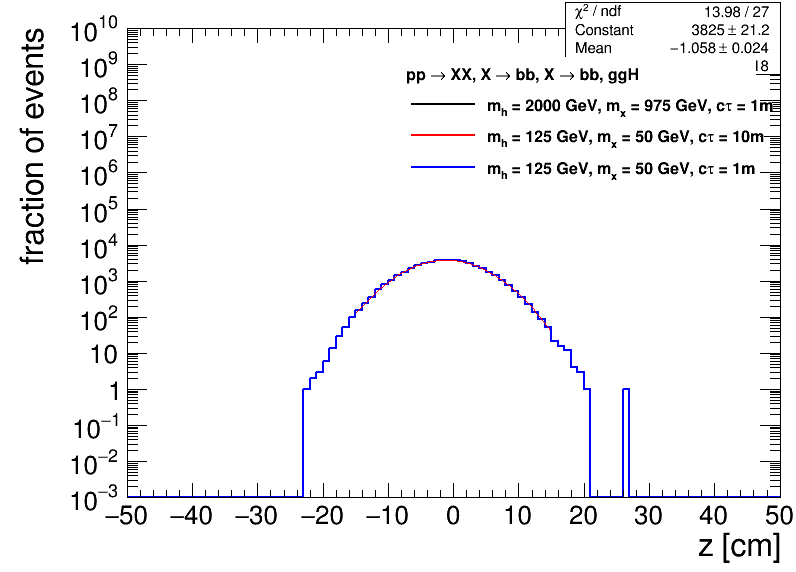

In [42]:
# plot leading jet time
c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.50,0.68,0.95,0.90);
leg.SetTextSize(0.03)
rt.gStyle.SetOptStat(0000)
i = 0

htm ={}
for k,v in tree.items():   
    print(k, v)
    LLP_prod_z = v['gLLP_prod_vertex_z'].array()
    z = LLP_prod_z[:,0]
#     jetGenTime = v['gen_time'].array()
#     jetmatch = v['gLLP_daughter_match_jet_index'].array()
#     weight = v['genWeight'].array()
#     t = jetGenTime[:,0]
#     vt = jetGenTime[jetmatch!=666]
#     print(jetGenTime[0],jetmatch[0],vt[0:10])
#     t = vt[:0]
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50])
    htm[k] = create_TH1D( z, axis_title=[' z [cm]', 'fraction of events'], name=k, binning=[100,-50,50])
#     ht0[k] = create_TH1D( t, axis_title=['GenTime [ns]', 'fraction of events'], name=k, binning=[100,-5,50], weights = weight)
    htm[k].SetLineColor(std_color_list[i])
    htm[k].SetMarkerColor(std_color_list[i])
    htm[k].GetYaxis().SetRangeUser(1e-3,1e10)


    leg.AddEntry(htm[k],texs[k])

    htm[k].DrawNormalized('same')
    htm[k].Fit('gaus','','',-15,15)
    
    i += 1

leg.SetHeader(str(MODEL))
leg.SetBorderSize(0)

leg.Draw()
c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'LLP_Prod_Vtx_z.png')
